In [5]:
# preparation
import matplotlib.pyplot as plt
import numpy as np

In [123]:
# data 
x=[1,2,4,8,16,32,64,128]
liny=x
prac=[1,1.7,3,5,6.5,8,7,5]

def amdahl(p,s):
    res=[]
    for x in s:
        res.append(1/((1-p)+p/x))
    return res

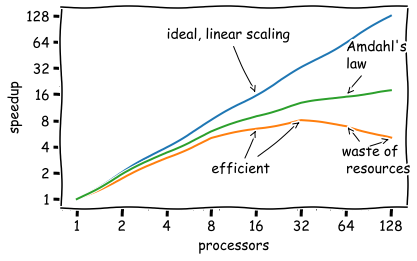

In [125]:
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.set_xscale('log')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_yscale('log')
    ax.set_yticks(x)
    ax.set_yticklabels(x)
    ax.set_xlabel('processors')
    ax.set_ylabel('speedup')

    ax.plot(x,liny)
    ax.plot(x,prac)
    ax.plot(x,amdahl(0.95,x))
    
    ax.annotate('ideal, linear scaling',
        xy=(x[4], x[4]), arrowprops=dict(arrowstyle='->'), xytext=(4, 70))
    ax.annotate('waste of\n resources',
        xy=(x[-2], prac[-2]), arrowprops=dict(arrowstyle='->'), xytext=(60, 2))
    ax.annotate('',
        xy=(x[-1], prac[-1]), arrowprops=dict(arrowstyle='->'), xytext=(90, 4))
    ax.annotate('efficient',
        xy=(x[4], prac[4]), arrowprops=dict(arrowstyle='->'), xytext=(8, 2))
    ax.annotate('',
        xy=(x[5], prac[5]), arrowprops=dict(arrowstyle='->'), xytext=(16, 3))
    ax.annotate("Amdahl's\nlaw",
        xy=(x[6], amdahl(0.95,[x[6]])[0]), arrowprops=dict(arrowstyle='->'), xytext=(64, 32))

    plt.savefig('../scaling.png', bbox_inches="tight")

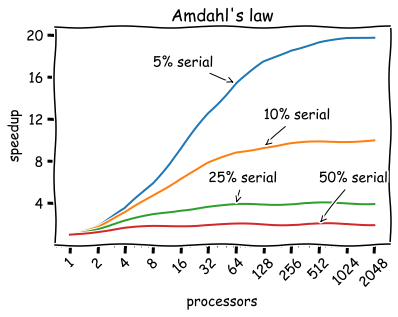

In [121]:
r=range(12)
x=np.power(2,r)

fmt = lambda x: "{:d}".format(x)

with plt.xkcd():
    fig = plt.figure()

    plt.title("Amdahl's law")
    plt.xscale('log')
    plt.xticks(x, [fmt(i) for i in x], rotation=45)
    y=np.arange(0,21,4)
    plt.yticks(y, [fmt(i) for i in y])

    plt.xlabel('processors')
    plt.ylabel('speedup')

    plt.plot(x,amdahl(0.95,x))
    plt.plot(x,amdahl(0.90,x))
    plt.plot(x,amdahl(0.75,x))
    plt.plot(x,amdahl(0.50,x))
    
    plt.annotate("5% serial",
        xy=(x[6], amdahl(0.95,[x[6]])[0]), arrowprops=dict(arrowstyle='->'), xytext=(8, 17))
    plt.annotate("10% serial",
        xy=(x[7], amdahl(0.90,[x[7]])[0]), arrowprops=dict(arrowstyle='->'), xytext=(128, 12))
    plt.annotate("25% serial",
        xy=(x[6], amdahl(0.75,[x[6]])[0]), arrowprops=dict(arrowstyle='->'), xytext=(32, 6))
    plt.annotate("50% serial",
        xy=(x[9], amdahl(0.50,[x[9]])[0]), arrowprops=dict(arrowstyle='->'), xytext=(512, 6))

    plt.savefig('../amdahl.png', )